# Record breaking daily temperatures for Ann Arbor, Michigan in 2015

We have data on daily temperature readings from Ann Arbor, Michigan between 2004-2015 from multiple weather stations. We wish to examine how the maximum and minimum daily teperatures in 2015 compare with the record maximum and minimum temperatures over the previous 10 years. 

The data for this chart comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network] (GHCN-Daily). 

The following variables are provided:

 **id** : station identification code
 
 **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
 
 **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
 **value** : data value for element (tenths of degrees C)

In [67]:
#Import libraries and data:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

data = pd.read_csv(r"F:\Users\Sarah\Statistics\Coursera\Ann_arbor_weather.csv")
data.head(3)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [69]:
#Remove February 29th entries:
data = data[~data['Date'].str.contains("-02-29")]
len(data)

165002

In [70]:
#Create 2 dataframes, one for 2005-2014, one for 2015:
data_2015 = data[data['Date'].str.contains("2015")].copy()

ten_year = data[~data['Date'].str.contains("2015")].copy()

## For ten year data group by date, get the daily max and min, plot


In [71]:
ten_year.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [72]:
#We change all the years to 2015 so we keep the date functionality when we plot:

ten_year ['Date'] = ten_year['Date'].replace(to_replace="^.{4}",value="2015",regex=True)
ten_year.head()

,ID,Date,Element,Data_Value
0,USW00094889,2015-11-12,TMAX,22
1,USC00208972,2015-04-29,TMIN,56
2,USC00200032,2015-05-26,TMAX,278
3,USC00205563,2015-11-11,TMAX,139
4,USC00200230,2015-02-27,TMAX,-106


In [73]:
#Change date to datetime:
ten_year['Date'] =pd.to_datetime(ten_year['Date'])
ten_year['Date'].dtype

dtype('<M8[ns]')

In [74]:
#Calculate ten year maxs:
ten_max = ten_year[ten_year['Element']=='TMAX'].groupby(ten_year['Date'])['Data_Value'].max()
print(len(ten_max))
ten_max.head()

365


Date
2015-01-01    156
2015-01-02    139
2015-01-03    133
2015-01-04    106
2015-01-05    128
Name: Data_Value, dtype: int64

In [75]:
#Calculate ten year mins:
ten_min = ten_year[ten_year['Element']=='TMIN'].groupby(ten_year['Date'])['Data_Value'].min()
print(len(ten_min))
ten_min.head()

365


Date
2015-01-01   -160
2015-01-02   -267
2015-01-03   -267
2015-01-04   -261
2015-01-05   -150
Name: Data_Value, dtype: int64

In [76]:
#Put tenyear max and mins in a df together:
ten = pd.concat([ten_min,ten_max], axis=1)
ten.columns = ['Min_10','Max_10']
print(len(ten))
ten.head()

365


,Min_10,Max_10
Date,,
2015-01-01,-160,156
2015-01-02,-267,139
2015-01-03,-267,133
2015-01-04,-261,106
2015-01-05,-150,128


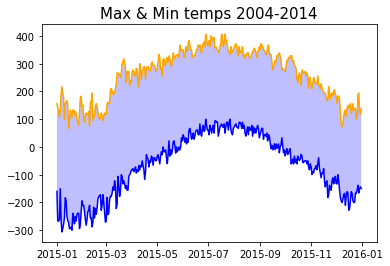

In [77]:
#Plot maxs and mins:
plt.figure()
plt.plot(ten.index,ten['Max_10'], c='orange', label="Maxs")
plt.plot(ten.index,ten['Min_10'], c='blue', label="Mins")
plt.fill_between(ten.index, ten['Min_10'],ten['Max_10'], facecolor='blue',alpha=0.25)
plt.title("Max & Min temps 2004-2014", fontsize=15)
plt.show()

## For 2015 data. Group by date, get the daily max and min data, plot

In [78]:
data_2015.head()

,ID,Date,Element,Data_Value
19,USC00205563,2015-01-03,TMIN,-39
30,USC00203712,2015-03-17,TMAX,189
34,USC00200032,2015-06-06,TMIN,128
46,USW00014833,2015-08-30,TMIN,178
50,USC00202308,2015-08-30,TMIN,156


In [79]:
#Change date to datetime:
data_2015['Date'] =pd.to_datetime(data_2015['Date'])
data_2015['Date'].dtype

dtype('<M8[ns]')

In [80]:
#Get max daily values for 2015:
max_2015 = data_2015[data_2015['Element']=='TMAX'].groupby('Date').Data_Value.max()
print(len(max_2015))
max_2015.head()

365


Date
2015-01-01    11
2015-01-02    39
2015-01-03    39
2015-01-04    44
2015-01-05    28
Name: Data_Value, dtype: int64

In [81]:
#Get min daily values for 2015:
min_2015 = data_2015[data_2015['Element']=='TMIN'].groupby('Date').Data_Value.min()
print(len(min_2015))
min_2015.head()

365


Date
2015-01-01   -133
2015-01-02   -122
2015-01-03    -67
2015-01-04    -88
2015-01-05   -155
Name: Data_Value, dtype: int64

In [82]:
#Join 2015 min and max frames together:
fifteen = pd.concat([min_2015,max_2015], axis=1)
fifteen.columns = ['Min_15','Max_15']
print(len(fifteen))
fifteen.head()

365


,Min_15,Max_15
Date,,
2015-01-01,-133,11
2015-01-02,-122,39
2015-01-03,-67,39
2015-01-04,-88,44
2015-01-05,-155,28


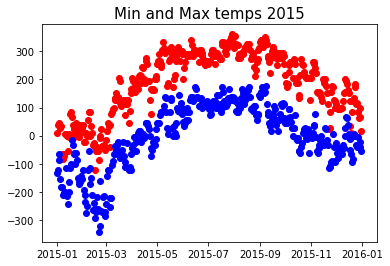

In [83]:
# Plot 2015 min and max data:
plt.figure()
plt.scatter(fifteen.index,fifteen['Max_15'], c='red', label="max15")
plt.scatter(fifteen.index,fifteen['Min_15'], c='blue', label="min15")

plt.title("Min and Max temps 2015", fontsize=15)
plt.show()

## Join 10 year and 2015 frames together

In [84]:
all_df = pd.merge(ten,fifteen, left_index=True,right_index=True,how='outer')
print(len(all_df))
all_df.head()

365


,Min_10,Max_10,Min_15,Max_15
Date,,,,
2015-01-01,-160,156,-133,11
2015-01-02,-267,139,-122,39
2015-01-03,-267,133,-67,39
2015-01-04,-261,106,-88,44
2015-01-05,-150,128,-155,28


In [85]:
#Change temps into degrees from tenths of degrees:
all_df = all_df/10
all_df.head()

,Min_10,Max_10,Min_15,Max_15
Date,,,,
2015-01-01,-16.0,15.6,-13.3,1.1
2015-01-02,-26.7,13.9,-12.2,3.9
2015-01-03,-26.7,13.3,-6.7,3.9
2015-01-04,-26.1,10.6,-8.8,4.4
2015-01-05,-15.0,12.8,-15.5,2.8


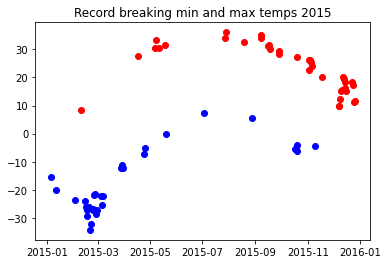

In [90]:
#Get min outliers:
all_df['Min_outlier'] = all_df['Min_15']-all_df['Min_10']
all_df['Min_outlier'] = np.where(all_df['Min_outlier']<0, all_df['Min_15'], np.nan)

#Get max outliers:
all_df['Max_outlier'] = all_df['Max_15']-all_df['Max_10']
all_df['Max_outlier'] = np.where(all_df['Max_outlier']>0, all_df['Max_15'], np.nan)

#Plot 2015 Min and max outliers:
plt.scatter(all_df.index,all_df['Min_outlier'], c='blue', label="min15")
plt.scatter(all_df.index,all_df['Max_outlier'], c='red', label="max15")
plt.title("Record breaking min and max temps 2015")
plt.show()

## Combine into one chart showing 2015 record breaking temps:

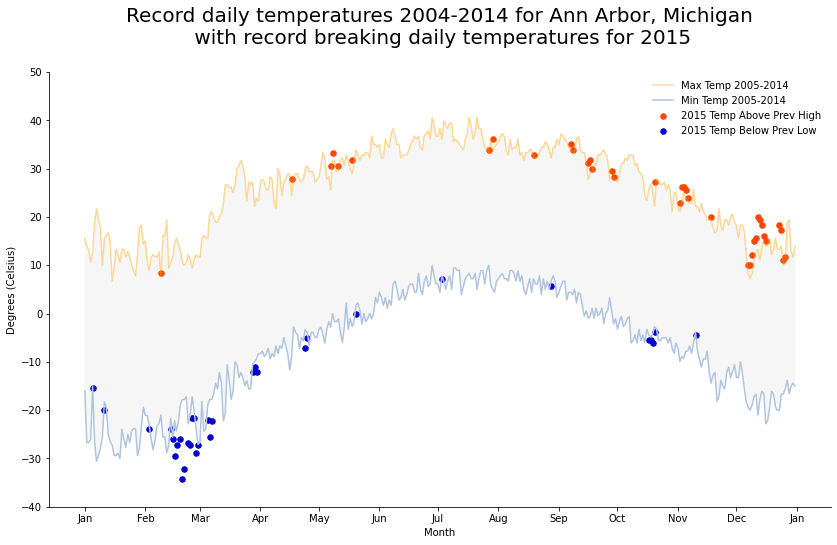

In [88]:
import matplotlib.dates as mdates


plt.figure(figsize=(14,8))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.plot(all_df.index,all_df['Max_10'], c='orange',alpha=0.4, label="Maxs", zorder=20)
plt.plot(all_df.index,all_df['Min_10'], c='lightsteelblue',label="Mins",zorder=15)
plt.scatter(all_df.index,all_df['Max_outlier'], c='orangered', s=30,label="max15")
plt.scatter(all_df.index,all_df['Min_outlier'], c='mediumblue', s=30,label="min15")
plt.fill_between(all_df.index,all_df['Min_10'],all_df['Max_10'], facecolor='gray',alpha=0.07)
plt.title("Record daily temperatures 2004-2014 for Ann Arbor, Michigan\n with record breaking daily temperatures for 2015\n",fontsize=20)
plt.legend(['Max Temp 2005-2014', 'Min Temp 2005-2014','2015 Temp Above Prev High','2015 Temp Below Prev Low'], frameon=False)
plt.xlabel('Month')
plt.ylabel('Degrees (Celsius)')
plt.ylim(-40,50)
locator = mdates.MonthLocator()
myFmt = mdates.DateFormatter('%b')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.gca().xaxis.set_major_locator(locator)
plt.show()

### Summary:
Compared to the previous 10 years, 2015 had a particularly cold spell in late February and early March and a cluster of record breaking warm days in December.